# Low-rank approximations

Assume we have a training set composed of $N$ data points.
Fitting a (full-rank) GPR model requires:
- $\mathcal{O}(N^2)$ memory (for storing the $N\times N$ kernel matrix)
- $\mathcal{O}(N^3)$ time (dominated by inverting above matrix)

Further, assume we want to make predictions at $T$ test points. Making predictions requires:
- $\mathcal{O}(NT)$ time and memory to compute the predictive mean (dominated by calculating the $N\times T$ matrix of kernel evaluations)
- $\mathcal{O}(N^2T)$ time to compute the predictive (diagonal) variance

This means that full-rank GPR models become prohibitively expensive for large datasets.

A popular approach to reducing this cost is to approximate the $N\times N$ kernel matrix taken over the training data with a lower-rank matrix. To do this, a set of $M$ "sparse" or "inducing" points are chosen at representative locations in the training data. This slightly reduces the accuracy of the model, but can dramatically reduce the cost of fitting and inference when $M \ll N$:

- $\mathcal{O}(NM^2 + M^3)$ memory to store the $M\times M$ kernel matrix over the inducing points
- $\mathcal{O}(N^2M + M^3)$ time to fit the model
- $\mathcal{O}(TM)$ time to make mean predictions
- $\mathcal{O}(TM^2)$ space to make predictive variance predictions

`mini-gpr` implements the [Subset of Regressors](https://uk.mathworks.com/help/stats/subset-of-regressors-approximation-for-gpr-models.html) (`SoR`) approach: this model conforms to the same interface as the full-rank `GPR` model, and so is very easy to use as a drop-in replacement.

Below, we show examples of optimising both GPR and SoR models for a synthetic 1D system:

{'sigma': 2.2437003072015034, 'scale': 1.4595497350774491}


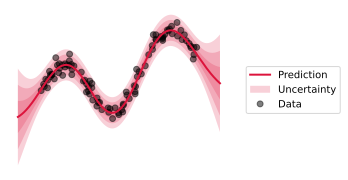

In [1]:
from mini_gpr.kernels import RBF
from mini_gpr.models import GPR
from mini_gpr.opt import maximise_log_likelihood, optimise_model
from mini_gpr.tutorials import sample_toy_1d_system
from mini_gpr.viz import show_model_predictions

x_train, y_train = sample_toy_1d_system()
full_rank_model = optimise_model(
    GPR(RBF(), noise=0.1),
    maximise_log_likelihood,
    x_train,
    y_train,
    optimise_noise=True,
)
show_model_predictions(full_rank_model, x_train, y_train)
print(full_rank_model.kernel.params)

{'sigma': 2.5377083633879733, 'scale': 2.2140375820386287}


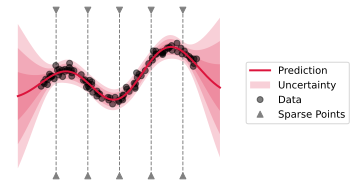

In [2]:
import numpy as np

from mini_gpr.models import SoR

model = SoR(
    kernel=RBF(),
    # use 5 inducing points, equally along the range of the training data
    sparse_points=np.linspace(1, 9, num=5),
    noise=0.1,
)
low_rank_model = optimise_model(
    model,
    maximise_log_likelihood,
    x_train,
    y_train,
    optimise_noise=True,
)
show_model_predictions(low_rank_model, x_train, y_train)
print(low_rank_model.kernel.params)